In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
train_df = pd.read_csv('./dataset/train_emoji.csv', header = None).iloc[:, :2]
train_df.head()

,0,1
0,never talk to me again,3
1,I am proud of your achievements,2
2,It is the worst day in my life,3
3,Miss you so much,0
4,food is life,4


In [10]:
test_df = pd.read_csv('./dataset/test_emoji.csv', header = None).iloc[:, :2]
test_df.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a very nice raise\t,2
3,she got me a nice present\t,2
4,ha ha ha it was so funny\t,2


In [11]:
for i in range(len(test_df.iloc[:, 0])):
    if test_df.iloc[i, 0][-1] == '\t':
        test_df.iloc[i, 0] = test_df.iloc[i, 0][:-1]

In [12]:
test_df.head()

,0,1
0,I want to eat,4
1,he did not answer,3
2,he got a very nice raise,2
3,she got me a nice present,2
4,ha ha ha it was so funny,2


In [13]:
emoji_dictionary = {
    "0": "\u2764\uFE0F",
    "1": ":baseball:",
    "2": ":grinning_face_with_big_eyes:",
    "3": ":disappointed_face:",
    "4": ":fork_and_knife:",
    "5": ":hundred_points:",
    "6": ":fire:",
    "7": ":face_blowing_a_kiss:",
    "8": ":chestnut:",
    "9": ":flexed_biceps:"
}

In [14]:
import emoji

In [15]:
for k, v in emoji_dictionary.items():
    print(emoji.emojize(v))

❤️
⚾
😃
😞
🍴
💯
🔥
😘
🌰
💪


In [19]:
X_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 0].values
Y_train = train_df.iloc[:, 1].values
Y_test = test_df.iloc[:, 1].values

In [26]:
from keras.utils import to_categorical

In [28]:
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

In [29]:
word_vectors = {}

In [31]:
with open('./glove.6B.50d.txt', 'r', encoding = 'utf-8') as f:
    for line in f:
        word = line.split()[0]
        vector = line.split()[1:]
        word_vectors[word] = vector

In [57]:
def word_embedding(lines, dims = 50, max_len = 10):
    cnt = 0
    m = len(lines)
    ans = np.zeros((m, max_len, dims))
    
    for i, line in enumerate(lines):
        words = line.split()
        for j, word in enumerate(words):
            try:
                ans[i, j] = word_vectors[word]
                cnt += 1
            except:
                pass
    return ans, cnt

In [58]:
X_train_embedding, cnt = word_embedding(X_train)

In [59]:
X_test_embedding, cnt = word_embedding(X_test)

In [62]:
from keras.models import Sequential
from keras.layers import *

In [63]:
model = Sequential()
model.add(LSTM(64, input_shape = (10, 50), return_sequences = True))
model.add(LSTM(64))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            29440     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 64,709
Trainable params: 64,709
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [65]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [69]:
es = EarlyStopping(patience = 30, mode = 'max', verbose = 1, monitor = 'val_accuracy')
mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

In [70]:
hist = model.fit(X_train_embedding, Y_train_cat, epochs = 200, validation_split = 0.25, callbacks = [es, mc])

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 1.5917 - accuracy: 0.2525 
Epoch 1: val_accuracy improved from -inf to 0.30303, saving model to best_model.h5
4/4 [==============================] - 14s 802ms/step - loss: 1.5917 - accuracy: 0.2525 - val_loss: 1.5690 - val_accuracy: 0.3030
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 1.5438 - accuracy: 0.3434
Epoch 2: val_accuracy did not improve from 0.30303
4/4 [==============================] - 0s 43ms/step - loss: 1.5438 - accuracy: 0.3434 - val_loss: 1.5615 - val_accuracy: 0.3030
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.4974 - accuracy: 0.3838
Epoch 3: val_accuracy improved from 0.30303 to 0.33333, saving model to best_model.h5
4/4 [==============================] - 0s 55ms/step - loss: 1.4974 - accuracy: 0.3838 - val_loss: 1.5552 - val_accuracy: 0.3333
Epoch 4/200
1/4 [======>.......................] - ETA: 0s - loss: 1.5120 - accuracy: 0.3125
Epoch 4: val_accuracy

4/4 [==============================] - 0s 36ms/step - loss: 0.4843 - accuracy: 0.8182 - val_loss: 1.0422 - val_accuracy: 0.7273
Epoch 30/200
4/4 [==============================] - ETA: 0s - loss: 0.3156 - accuracy: 0.8788
Epoch 30: val_accuracy did not improve from 0.75758
4/4 [==============================] - 0s 40ms/step - loss: 0.3156 - accuracy: 0.8788 - val_loss: 1.0297 - val_accuracy: 0.6970
Epoch 31/200
4/4 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.9091
Epoch 31: val_accuracy did not improve from 0.75758
4/4 [==============================] - 0s 37ms/step - loss: 0.2656 - accuracy: 0.9091 - val_loss: 0.9031 - val_accuracy: 0.7576
Epoch 32/200
1/4 [======>.......................] - ETA: 0s - loss: 0.1521 - accuracy: 0.9688
Epoch 32: val_accuracy did not improve from 0.75758
4/4 [==============================] - 0s 37ms/step - loss: 0.3459 - accuracy: 0.8586 - val_loss: 0.8559 - val_accuracy: 0.6970
Epoch 33/200
4/4 [==============================] 

In [73]:
loss = hist.history['loss']
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

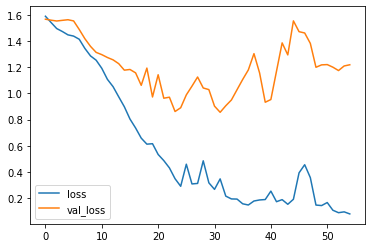

In [74]:
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

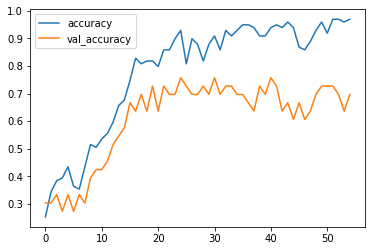

In [75]:
plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.legend()
plt.show()

In [77]:
from keras.models import load_model

In [78]:
saved_model = load_model('./best_model.h5')

In [79]:
saved_model.evaluate(X_train_embedding, Y_train_cat)saved_model.evaluate(X_train_embedding, Y_train_cat)

5/5 [==============================] - 2s 10ms/step - loss: 0.4957 - accuracy: 0.8258


[0.49574342370033264, 0.8257575631141663]

In [80]:
saved_model.evaluate(X_test_embedding, Y_test_cat)

2/2 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.7143


[0.6532823443412781, 0.7142857313156128]

In [81]:
Y_pred_test = saved_model.predict(X_test_embedding)

2/2 [==============================] - 2s 17ms/step


In [84]:
Y_pred = Y_pred_test.argmax(axis = 1)

In [86]:
for i, line in enumerate(X_test):
    p_e = emoji.emojize(emoji_dictionary.get(str(Y_pred[i])))
    print(line, p_e)

I want to eat 🍴
he did not answer 😞
he got a very nice raise 😃
she got me a nice present ❤️
ha ha ha it was so funny 😃
he is a good friend 😃
I am upset 😞
We had such a lovely dinner tonight 😃
where is the food 🍴
Stop making this joke ha ha ha 😃
where is the ball ⚾
work is hard 😞
This girl is messing with me 😞
are you serious 😞
Let us go play baseball ⚾
This stupid grader is not working  😞
work is horrible 😞
Congratulation for having a baby ❤️
stop pissing me off 😞
any suggestions for dinner 😃
I love taking breaks 😞
you brighten my day ❤️
I boiled rice 🍴
she is a bully ❤️
Why are you feeling bad 😞
I am upset 😞
give me the ball ⚾
My grandmother is the love of my life ❤️
enjoy your game ⚾
valentine day is near 😃
I miss you so much ❤️
throw the ball ⚾
My life is so boring ❤️
she said yes 😞
will you be my valentine ❤️
he can pitch really well ⚾
dance with me 😃
I am hungry 🍴
See you at the restaurant 😃
I like to laugh 😃
I will  run ⚾
I like your jacket  ❤️
i miss her 😞
what is your favorite 

In [90]:
with open('model_json.json', 'w') as file:
    file.write(saved_model.to_json())